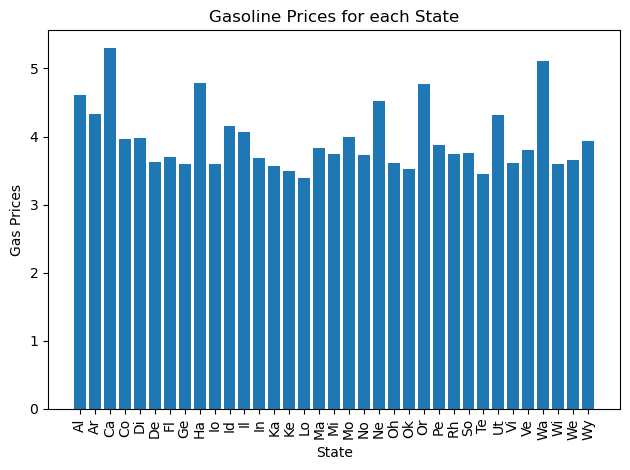

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ev_reg = pd.read_excel('../Activities/EVRegistrations.xlsx')
gas_price = pd.read_csv('../Activities/gas_price_by_state.csv')

long_name = gas_price.name
short_name = []
new_state_list = []

for state in long_name:
    for st in gas_price.name:
        if state in st:
            new_state_list.append(state)

for name in long_name:
    short_name.append(name[0:2])

#ev_reg.info()
#gas_price.info()
x = short_name
#x = ev_reg.State
#y = ev_reg['EV Registration Count']
plt.xlabel('State')
plt.ylabel('Gas Prices')
plt.title('Gasoline Prices for each State')
plt.bar(x,y)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()





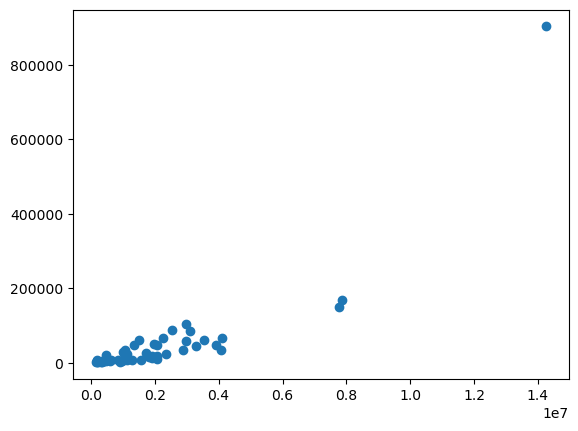

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

updated_merged = pd.read_csv('UpdatedEvRegMerged.csv')

updated_merged.head()

states = updated_merged['State']
y_reg = updated_merged['EVRegistrationCount']
x_gas = updated_merged['gasoline']
x_income = updated_merged['MedianIncome']
x_pop = updated_merged['StatePopulations']
x_tax = updated_merged['TaxEVIncentiveAmount']
x_totreg = updated_merged['TotalRegCount']
plt.scatter(x_totreg, y_reg)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ev_reg = pd.read_excel('../Activities/EVRegistrations.xlsx')
gas_price = pd.read_csv('../Activities/gas_price_by_state.csv')
ave_temp = pd.read_csv('../Activities/AveTempbyState.csv')

#ev_reg is State and has 52 rows
#gas_price is name and has 51 rows
#ave_temp might be State and has 51 rows

df1 = pd.concat([gas_price,ave_temp,ev_reg], axis= 1)


print(df1)
df1.to_csv('Complete_file.csv')



    Unnamed: 0 currency                  name  gasoline  midGrade  premium  \
0          0.0      usd                Alaska     4.603     4.795    4.987   
1          1.0      usd               Alabama     3.419     3.811    4.190   
2          2.0      usd              Arkansas     3.414     3.803    4.155   
3          3.0      usd               Arizona     4.332     4.622    4.911   
4          4.0      usd            California     5.294     5.503    5.655   
5          5.0      usd              Colorado     3.970     4.350    4.646   
6          6.0      usd           Connecticut     3.805     4.286    4.671   
7          7.0      usd  District of Columbia     3.972     4.540    4.885   
8          8.0      usd              Delaware     3.622     4.130    4.389   
9          9.0      usd               Florida     3.701     4.096    4.418   
10        10.0      usd               Georgia     3.603     4.006    4.389   
11        11.0      usd                Hawaii     4.784     5.00

In [43]:
import requests as rq
from bs4 import BeautifulSoup as soup   

url = 'http://www.usa.com/rank/us--average-temperature--state-rank.htm'
data = rq.get(url).text

temps = soup(data, "html.parser")

table = temps.find_all('table')
table = temps.find('table', width='648')

rank = []
average_temp = []
state_pop = []

for row in table.find_all('tr'):
    columns = row.find_all('td')
    rank.append(columns[0].text.strip())
    average_temp.append(columns[1].text.strip())
    state_pop.append(columns[2].text.strip())

r = pd.DataFrame(rank)
a = pd.DataFrame(average_temp)
s = pd.DataFrame(state_pop)

df = pd.concat([r,a,s], axis = 1)
df.columns = df.iloc[0]
df=df.drop([0])
df = df.sort_values(by=['State / Population'])
print(df)
df.to_csv('AveTempbyState.csv')



0  Rank Average Temperature ▼              State / Population
7    7.               62.68°F             Alabama / 4,817,678
51  51.               32.03°F                Alaska / 728,300
4    4.               65.97°F             Arizona / 6,561,516
12  12.               60.09°F            Arkansas / 2,947,036
10  10.               61.17°F         California / 38,066,920
41  41.               46.26°F            Colorado / 5,197,580
35  35.               48.60°F         Connecticut / 3,592,053
22  22.               54.48°F              Delaware / 917,060
18  18.               54.73°F  District of Columbia / 633,736
2    2.               71.80°F            Florida / 19,361,792
8    8.               62.30°F             Georgia / 9,907,756
1    1.               72.95°F              Hawaii / 1,392,704
40  40.               46.32°F               Idaho / 1,599,464
27  27.               51.37°F           Illinois / 12,868,747
26  26.               51.81°F             Indiana / 6,542,411
38  38. 

In [44]:
import pandas as pd
import requests as rq

url = 'http://www.usa.com/rank/us--average-temperature--state-rank.htm'
r = rq.get(url)
df_list = pd.read_html(r.text, header= 0)
print(df_list)


[    Rank Average Temperature ▼              State / Population
0    1.0               72.95°F              Hawaii / 1,392,704
1    2.0               71.80°F            Florida / 19,361,792
2    3.0               66.74°F           Louisiana / 4,601,049
3    4.0               65.97°F             Arizona / 6,561,516
4    5.0               65.97°F              Texas / 26,092,033
5    6.0               63.50°F         Mississippi / 2,984,345
6    7.0               62.68°F             Alabama / 4,817,678
7    8.0               62.30°F             Georgia / 9,907,756
8    9.0               61.70°F      South Carolina / 4,727,273
9   10.0               61.17°F         California / 38,066,920
10  11.0               60.14°F            Oklahoma / 3,818,851
11  12.0               60.09°F            Arkansas / 2,947,036
12  13.0               58.70°F      North Carolina / 9,750,405
13  14.0               58.11°F           Tennessee / 6,451,365
14  15.0               57.30°F              Nevada / 2